In [9]:
import sympy as sp

x = sp.symbols("x")

def F_m(m):
    return sp.integrate(sp.sin(x)*sp.E**(-sp.I*x*m), (x, -sp.pi, sp.pi))

v, K, alpha0 = sp.symbols(r"v  K \alpha_0")
nabdaWp, nabdaWm = sp.symbols(r"\nabla\mathbf{W}^+, \nabla\mathbf{W}^-")
omegaBarp, omegaBarm = sp.symbols(r"\bar{\omega}^+, \bar{\omega}^-")
varrho2p, varrho2m = sp.symbols(r"\varrho_2^+, \varrho_2^-")
wp, wm = sp.symbols(r"\mathbf{W}^+, \mathbf{W}^-")
rhop, rhom = sp.symbols(r"\rho^+, \rho^-")

eqDotVarrho2p = sp.Eq(
    -v / 2 * nabdaWp + 2 * sp.I * omegaBarp * varrho2p
    + sp.I * 2 * K / 2 / sp.pi * (wp * wp * F_m(1) + sp.E**(-sp.I * alpha0) * wp * wm * F_m(1))
    - sp.I * 2 * K * rhom * varrho2p * sp.sin(alpha0)
, 0)
eqDotVarrho2m = sp.Eq(
    -v / 2 * nabdaWm + 2 * sp.I * omegaBarm * varrho2m
    + sp.I * 2 * K / 2 / sp.pi * (wm * wm * F_m(1) + sp.E**(-sp.I * alpha0) * wm * wp * F_m(1))
    - sp.I * 2 * K * rhop * varrho2m * sp.sin(alpha0)
, 0)
solution = sp.solve((eqDotVarrho2p, eqDotVarrho2m), (varrho2p, varrho2m))

In [2]:
F_m(1)

-I*pi

In [68]:
eqDotVarrho2p
print(sp.latex(eqDotVarrho2p))

- 2 i K \rho^{-} \varrho^{+}_{2} \sin{\left(\alpha_{0} \right)} + \frac{i K \left(- i \pi \left(\mathbf{W}^+\right)^{2} - i \pi \mathbf{W}^+ \mathbf{W}^- e^{- i \alpha_{0}}\right)}{\pi} + 2 i \bar{\omega}^+ \varrho^{+}_{2} - \frac{\nabla\mathbf{W}^+ v}{2} = 0


In [10]:
sp.expand(solution[varrho2p])

-2*I*K*\mathbf{W}^+**2*exp(I*\alpha_0)/(4*K*\rho^-*exp(I*\alpha_0)*sin(\alpha_0) - 4*\bar{\omega}^+*exp(I*\alpha_0)) - 2*I*K*\mathbf{W}^+*\mathbf{W}^-/(4*K*\rho^-*exp(I*\alpha_0)*sin(\alpha_0) - 4*\bar{\omega}^+*exp(I*\alpha_0)) + I*\nabla\mathbf{W}^+*v*exp(I*\alpha_0)/(4*K*\rho^-*exp(I*\alpha_0)*sin(\alpha_0) - 4*\bar{\omega}^+*exp(I*\alpha_0))

In [6]:
solution[varrho2p] = sp.simplify(sp.expand(solution[varrho2p]))
solution[varrho2m] = sp.simplify(sp.expand(solution[varrho2m]))

In [8]:
print(sp.latex(solution[varrho2p]))

\frac{i \left(- 2 K \left(\mathbf{W}^+\right)^{2} e^{i \alpha_{0}} - 2 K \mathbf{W}^+ \mathbf{W}^- + \nabla\mathbf{W}^+ v e^{i \alpha_{0}}\right) e^{- i \alpha_{0}}}{4 \left(K \rho^{-} \sin{\left(\alpha_{0} \right)} - \bar{\omega}^+\right)}


In [5]:
sp.simplify(solution[varrho2m])

I*(-2*K*\mathbf{W}^+*\mathbf{W}^- - 2*K*\mathbf{W}^-**2*exp(I*\alpha_0) + \nabla\mathbf{W}^-*v*exp(I*\alpha_0))*exp(-I*\alpha_0)/(4*(K*\rho^+*sin(\alpha_0) - \bar{\omega}^-))

In [17]:
import sympy as sp

# 定义符号变量
x, y = sp.symbols('x y')

# 定义方程组
eq1 = sp.Eq(x + y, 10)
eq2 = sp.Eq(x - y, 2)

# 解方程组，求解 y 的表达式
solution = sp.solve((eq1, eq2), (x, y))

# 输出结果
y_expression = solution[y]
print(f'y 的表达式: {y_expression}')

y 的表达式: 4


### PurePhaseModel

In [179]:
import numpy as np
from tqdm.notebook import tqdm
from itertools import product
import matplotlib.pyplot as plt

fixedValue = 1
haveManifold = False

# class RPhi3:
#     def __init__(self, alpha0: float, K: float = 9.6, delta: float = 1) -> None:
#         self.alpha0 = alpha0
#         self.K = K
#         self.delta = delta

#     def dot(self, x: np.ndarray) -> np.ndarray:
#         rP, rM, phi = x
#         if haveManifold:
#             rM = fixedValue  # invariant manifold
#         return np.array([
#             -rP * self.delta + self.K * (1 - rP**2) / 4 * (rP + rM * np.cos(phi + self.alpha0)),
#             -rM * self.delta + self.K * (1 - rM**2) / 4 * (rM + rP * np.cos(phi - self.alpha0)),
#             - self.K * rM * (1 + rP**2) / 4 / rP * np.sin(phi + self.alpha0)
#             - self.K * rP * (1 + rM**2) / 4 / rM * np.sin(phi - self.alpha0)
#         ])

class RPhi3:
    def __init__(self, alpha0: float, K: float = 9.6, delta: float = 1, omega0: float = 0.1) -> None:
        self.alpha0 = alpha0
        self.K = K
        self.delta = delta
        self.omega0 = omega0

    def dot(self, x: np.ndarray) -> np.ndarray:
        rP, rM, phi = x
        if haveManifold:
            rM = fixedValue  # invariant manifold
        return np.array([
            -rP * self.delta + self.K * (1 - rP**2) / 4 * (rP + rM * np.cos(phi + self.alpha0)),
            -rM * self.delta + self.K * (1 - rM**2) / 4 * (rM + rP * np.cos(phi - self.alpha0)),
            2 * self.omega0 
            - self.K * rM * (1 + rP**2) / 4 / rP * np.sin(phi + self.alpha0)
            - self.K * rP * (1 + rM**2) / 4 / rM * np.sin(phi - self.alpha0)
        ])

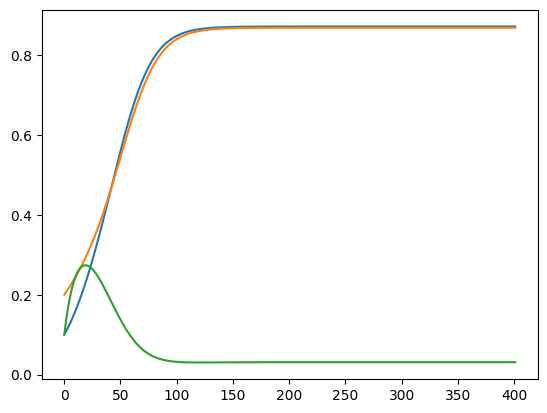

In [217]:
model = RPhi3(alpha0=-(np.pi / 2 - 0.8), K=9.6, delta=1)
# model = RPhi3(alpha0=, K=9.6, delta=1)
dt = 0.01

initState = [0.1, 0.2, 0.1]
initState = np.array(initState)
if haveManifold:    
    initState[1] = fixedValue  # invariant manifold
states = [initState]
state = initState
dots = []
for i in range(15000):
    dot = model.dot(state)
    dots.append(dot)
    state = state + dot * dt
    if haveManifold:
        state[1] = fixedValue  # invariant manifold
    states.append(state)
    if np.linalg.norm(dot) < 1e-9:
        break

states = np.array(states)
dots = np.array(dots)
plt.plot(states)

In [204]:
states

array([[0.1       , 0.2       , 0.1       ],
       [0.10603328, 0.204912  , 0.09236851],
       [0.11226203, 0.21001215, 0.08550033],
       [0.11869113, 0.2153052 , 0.07930935],
       [0.12532553, 0.22079589, 0.07372176],
       [0.13217021, 0.22648889, 0.06867382],
       [0.13923016, 0.23238878, 0.06411022],
       [0.14651034, 0.23850006, 0.05998265],
       [0.15401561, 0.24482704, 0.05624871],
       [0.16175074, 0.25137391, 0.05287099],
       [0.1697203 , 0.25814461, 0.04981632],
       [0.17792866, 0.26514284, 0.04705518],
       [0.18637993, 0.272372  , 0.04456117],
       [0.1950779 , 0.27983517, 0.04231059],
       [0.20402598, 0.28753501, 0.04028209],
       [0.21322712, 0.29547374, 0.03845637],
       [0.22268381, 0.3036531 , 0.03681592],
       [0.23239794, 0.31207423, 0.03534481],
       [0.24237074, 0.32073767, 0.03402853],
       [0.25260276, 0.32964326, 0.03285379],
       [0.26309372, 0.33879008, 0.03180841],
       [0.27384247, 0.3481764 , 0.03088119],
       [0.

  0%|          | 0/1 [00:00<?, ?it/s]

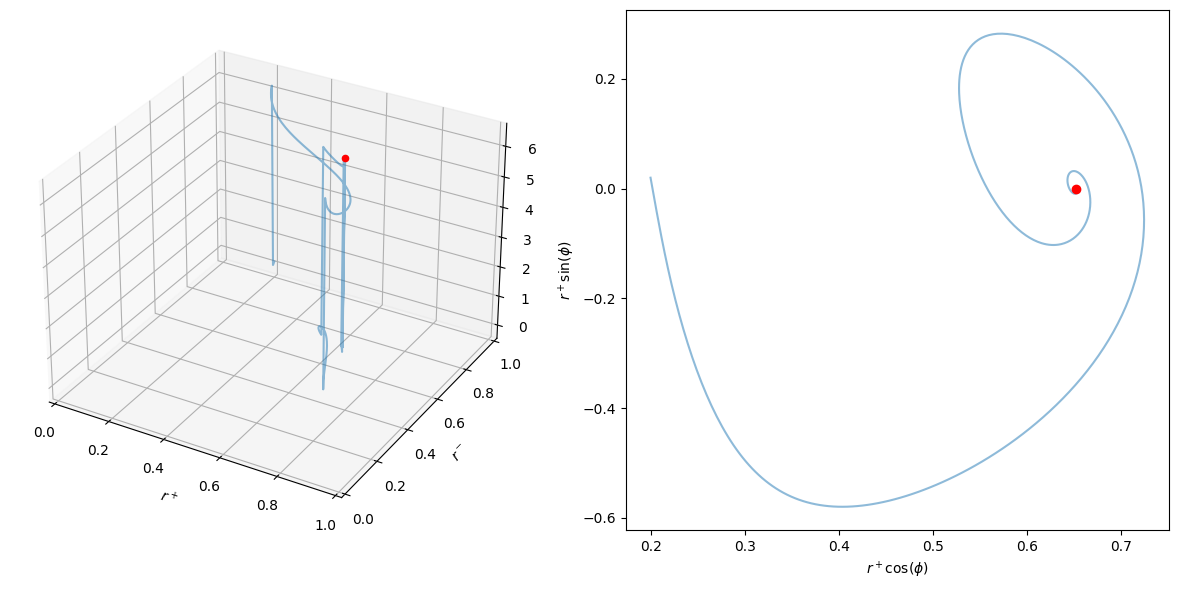

In [131]:
# initStates = list(product(np.linspace(0.05, 1, 5), np.linspace(0.05, 1, 5), np.linspace(0.05, np.pi - 0.05, 5)))
# initStates = list(product(np.linspace(0.1, 1, 11), [0.2], [np.pi / 4]))
initStates = [[0.2, 1, 0.1]]
model = RPhi3(alpha0=1.5, K=6.5, delta=1)
dt = 0.01

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121, projection='3d')
ax2 = plt.subplot(122, projection=None)
totalStates = dict()

for initState in tqdm(initStates):
    initState = np.array(initState)
    if haveManifold:
        initState[1] = fixedValue  # invariant manifold
    states = [initState]
    state = initState
    for i in range(15000):
        dot = model.dot(state)
        state = state + dot * dt
        state[[0, 1]] = np.clip(state[[0, 1]], 0.001, 1)
        state[2] = state[2] % (2 * np.pi)
        if haveManifold:
            state[1] = fixedValue  # invariant manifold
        states.append(state)
        if np.linalg.norm(dot) < 1e-9:
            break

    states = np.array(states)
    totalStates[tuple(initState)] = states
    ax1.plot(states[:, 0], states[:, 1], states[:, 2], alpha=0.5)
    ax1.scatter(states[-1, 0], states[-1, 1], states[-1, 2], c='r')
    ax2.plot(states[:, 0] * np.cos(states[:, 2]), states[:, 0] * np.sin(states[:, 2]), alpha=0.5)
    ax2.scatter(states[-1, 0] * np.cos(states[-1, 2]), states[-1, 0] * np.sin(states[-1, 2]), c='r', zorder=10)
    # ax2.text(states[-1, 0] * np.cos(states[-1, 2]), states[-1, 0] * np.sin(states[-1, 2]), f"{initState}", fontsize=8)

ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_xlabel(r"$r^+$")
ax1.set_ylabel(r"$r^-$")
ax2.set_xlabel(r"$r^+ \cos(\phi)$")
ax2.set_ylabel(r"$r^+ \sin(\phi)$")

plt.tight_layout()
plt.show()

alpha = 0.5pi + 0.01

K=5

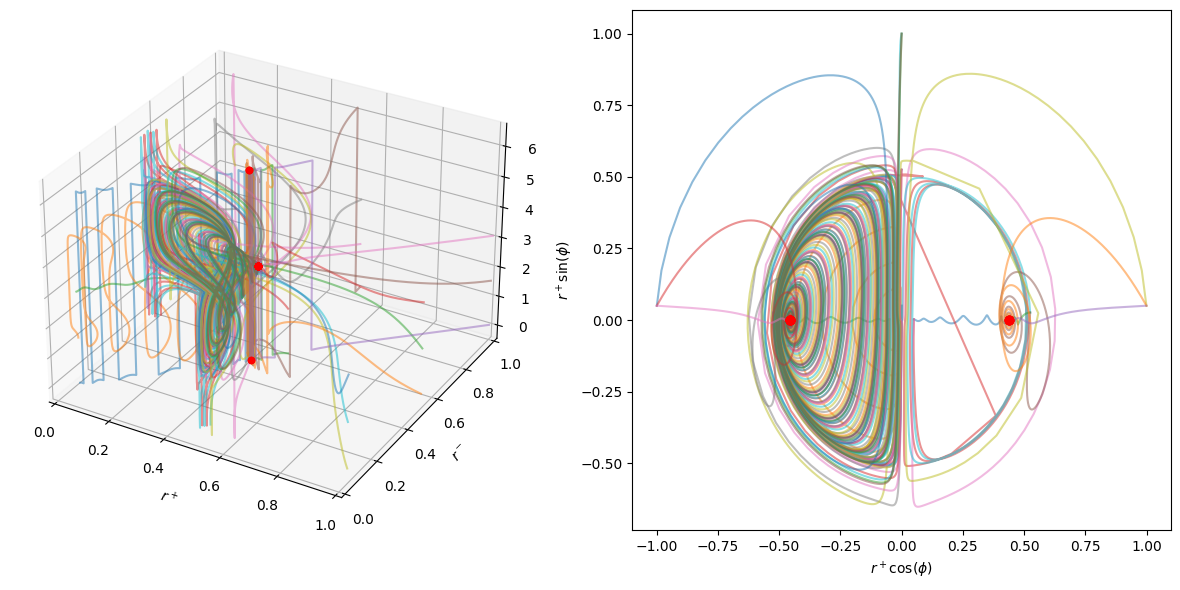

alpha = 0.5pi + 0.1

K=6

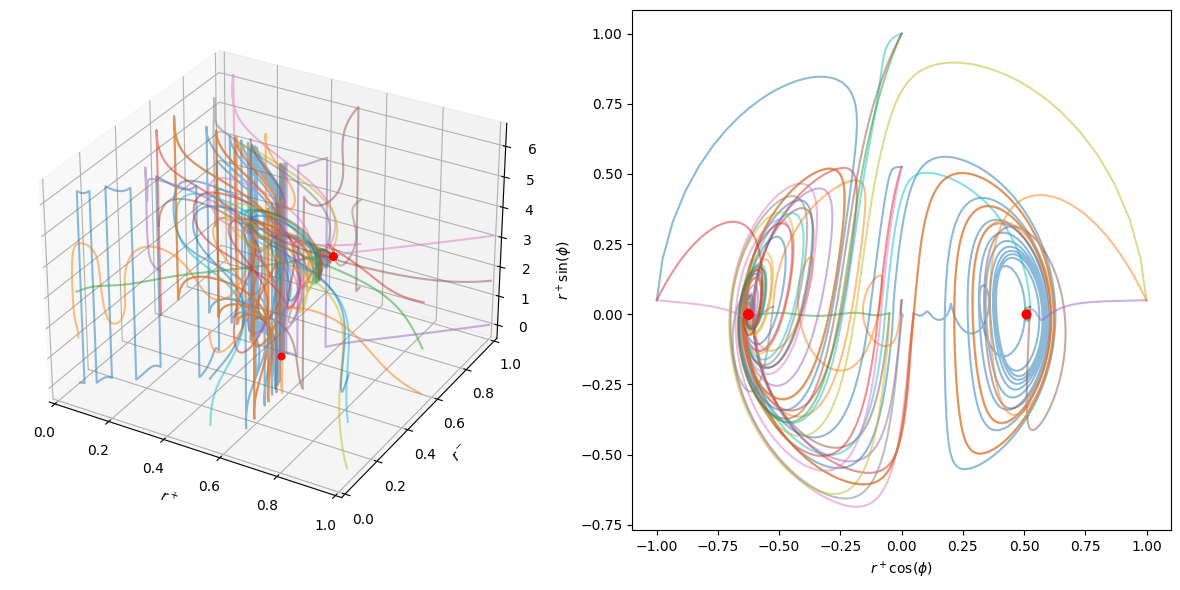

K=4

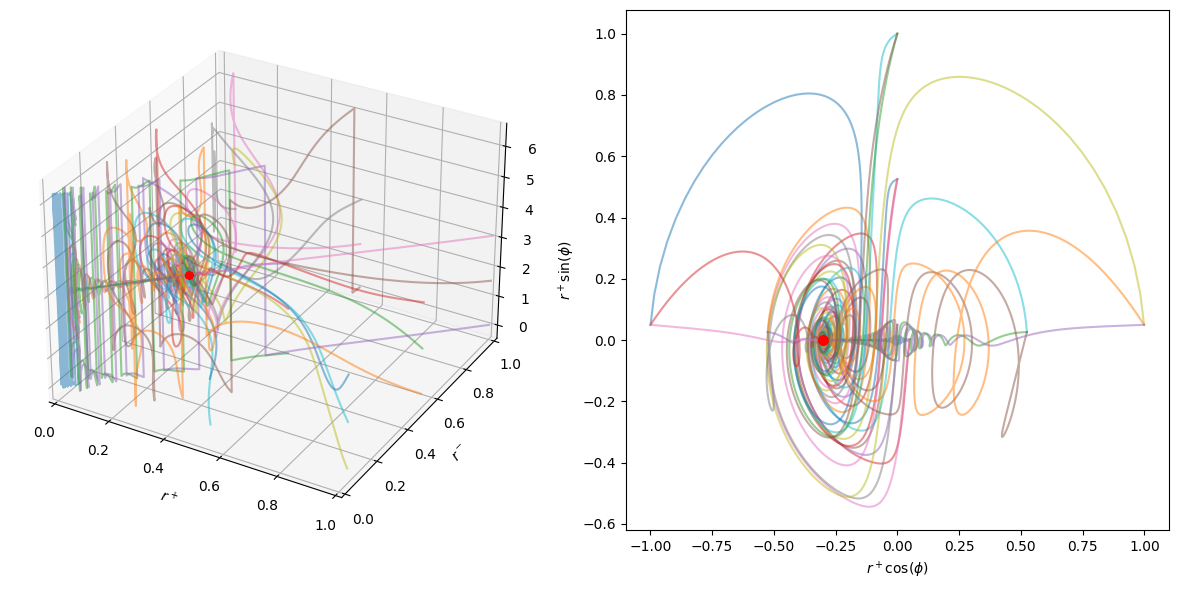
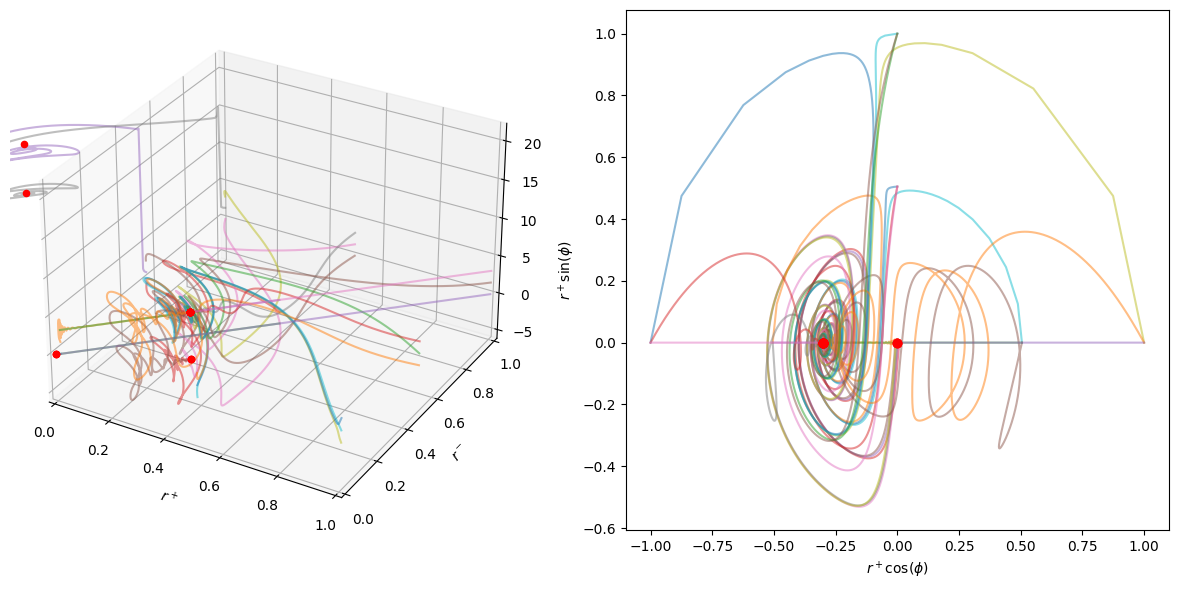
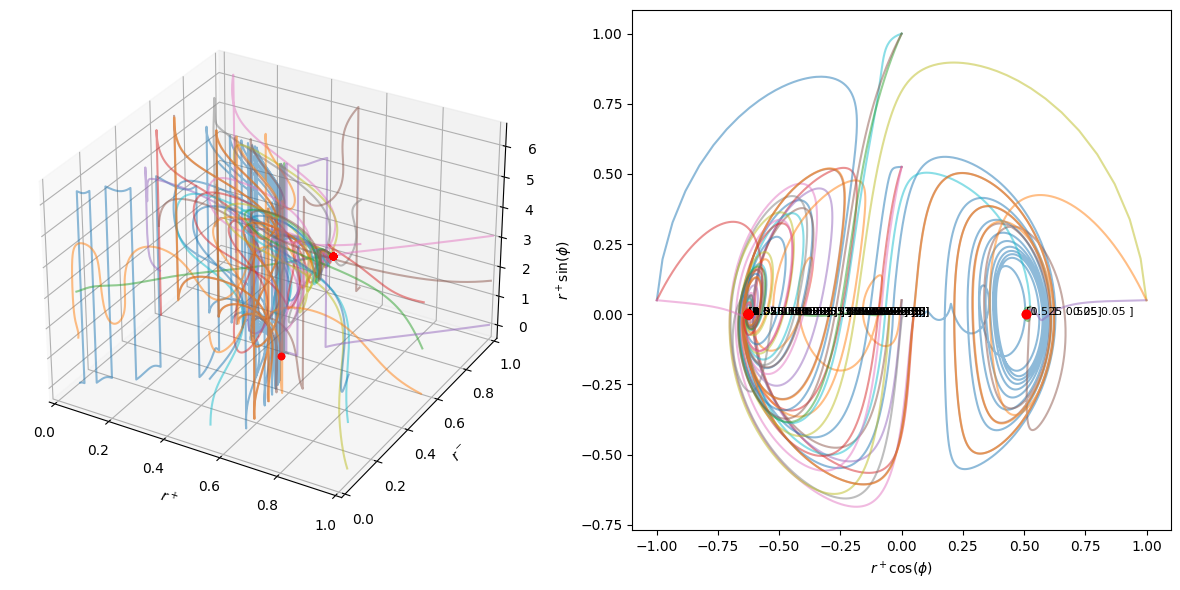
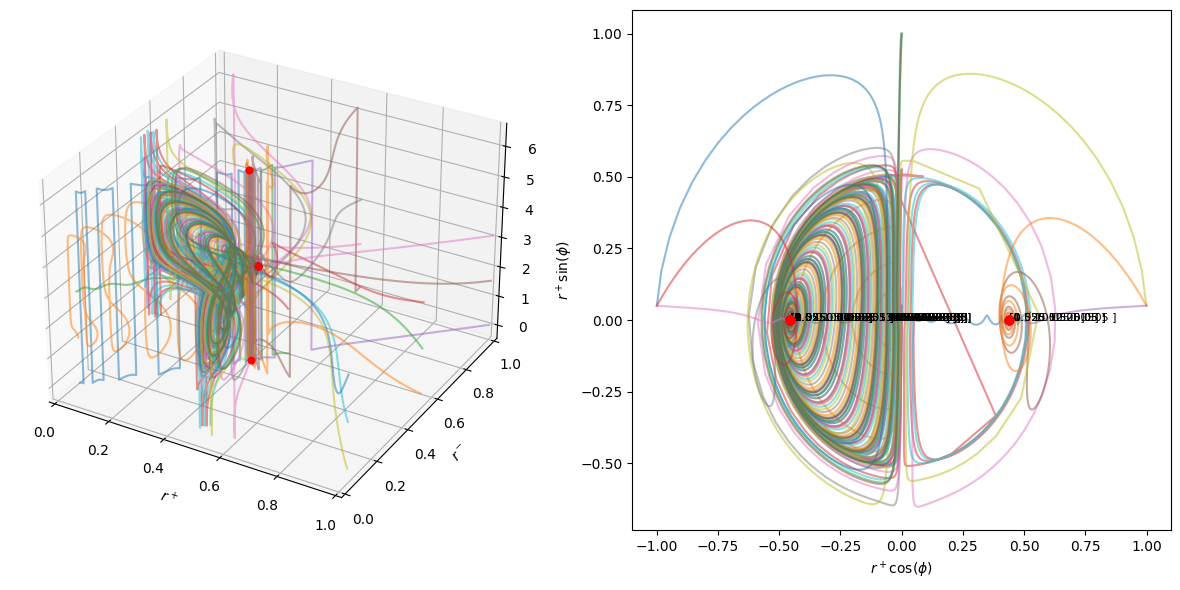

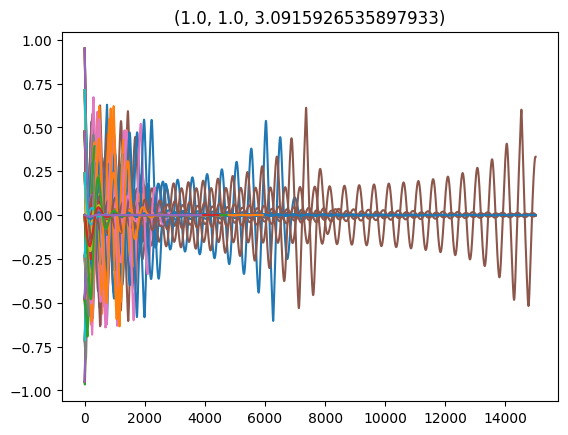

In [ ]:
for initState in list(totalStates.keys()):
    # initState = list(totalStates.keys())[7]
    states = totalStates[initState]
    plt.plot(states[:, 0] - states[:, 1])
    # plt.plot(states[:, 1])
    # plt.plot(states[:, 2])
    plt.title(initState)

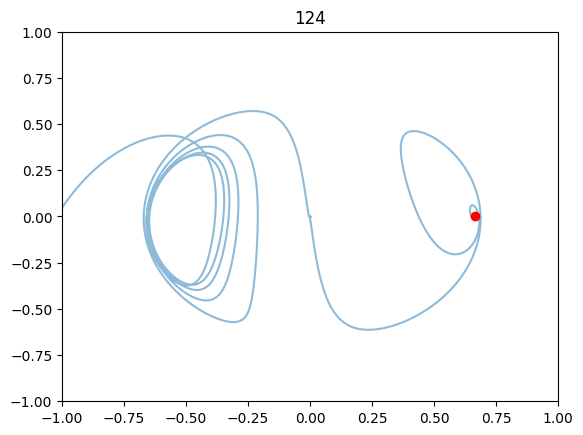

In [ ]:
# plt.figure(figsize=(6, 6))
# for idx, initState in enumerate(list(totalStates.keys())):
initState = list(totalStates.keys())[114]  # 114, 98
states = totalStates[initState]
# plt.plot(states[:, 0] - states[:, 1])
# plt.plot(states[:, 1])
# plt.plot(states[:, 2])
plt.plot(states[:, 0] * np.cos(states[:, 2]), states[:, 0] * np.sin(states[:, 2]), alpha=0.5)
plt.scatter(states[-1, 0] * np.cos(states[-1, 2]), states[-1, 0] * np.sin(states[-1, 2]), c='r', zorder=10)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

In [139]:
dot

array([-2.06848133,  0.22631473,  0.22847752])

In [1]:
import sympy as sp

rP, rM, delta, K, alpha0, phi = sp.symbols(r"r^+ r^- \Delta K \alpha_0 \varphi")

Eq1 = sp.Eq(-rP * delta + K * (1 - rP**2) / 4 * (rP + rM * sp.cos(phi + alpha0)), 0)
Eq2 = sp.Eq(-rM * delta + K * (1 - rM**2) / 4 * (rM + rP * sp.cos(phi - alpha0)), 0)
Eq3 = sp.Eq(
    - K * rM * (1 + rP**2) / 4 / rP * sp.sin(phi + alpha0)
    - K * rP * (1 + rM**2) / 4 / rM * sp.sin(phi - alpha0)
, 0)

In [2]:
Eq1

Eq(K*(1 - r^+**2)*(r^+ + r^-*cos(\alpha_0 + \varphi))/4 - \Delta*r^+, 0)

In [13]:
from scipy.optimize import fsolve
import numpy as np

delta = 1
K = 9.6
alpha0 = 0.5

def f(x):
    rP, rM, phi = x
    return [
        -rP * delta + K * (1 - rP**2) / 4 * (rP + rM * np.cos(phi + alpha0)),
        -rM * delta + K * (1 - rM**2) / 4 * (rM + rP * np.cos(phi - alpha0)),
        - K * rM * (1 + rP**2) / 4 / rP * np.sin(phi + alpha0)
        - K * rP * (1 + rM**2) / 4 / rM * np.sin(phi - alpha0)
    ]

# rP, rM, phi = 
fsolve(f, [0.1, 0.9, 0.1])

array([2.28633346e-15, 1.31128263e-15, 3.41075988e+00])

In [10]:
class Abrams2008:
    def __init__(self, alpha0: float, alpha1: float = 0, Kmu: float = 9.6, Knu: float = 9.6, delta: float = 0) -> None:
        self.alpha0 = alpha0
        self.alpha1 = alpha1
        self.Kmu = Kmu
        self.Knu = Knu
        self.delta = delta

    def dot(self, x: np.ndarray) -> np.ndarray:
        rP, rM, phi = x
        
        return np.array([
            -rP * self.delta + (1 - rP**2) / 2 * (self.Kmu * rP * np.cos(self.alpha1) + self.Knu * rM * np.cos(phi + self.alpha0)),
            -rM * self.delta + (1 - rM**2) / 2 * (self.Kmu * rM * np.cos(self.alpha1) + self.Knu * rP * np.cos(phi - self.alpha0)),
            -(1 + rP**2) / 2 / rP * (self.Kmu * rP * np.sin(self.alpha1) + self.Knu * rM * np.sin(phi + self.alpha0))
            +(1 + rM**2) / 2 / rM * (self.Kmu * rM * np.sin(self.alpha1) - self.Knu * rP * np.sin(phi - self.alpha0))
        ])
    
import sympy as sp

rP, rM, delta, Kmu, Knu, alpha0, alpha1, phi = sp.symbols(r"r^+ r^- \Delta \mu \nu \alpha_0 \alpha_1 \varphi")

delta = 0
rP = 1

Eq1 = sp.Eq(-rP * delta + (1 - rP**2) / 2 * (Kmu * rP * sp.cos(alpha1) + Knu * rM * sp.cos(phi + alpha0)), 0)
Eq2 = sp.Eq(-rM * delta + (1 - rM**2) / 2 * (Kmu * rM * sp.cos(alpha1) + Knu * rP * sp.cos(phi - alpha0)), 0)
Eq3 = sp.Eq(
    -(1 + rP**2) / 2 / rP * (Kmu * rP * sp.sin(alpha1) + Knu * rM * sp.sin(phi + alpha0))
    +(1 + rM**2) / 2 / rM * (Kmu * rM * sp.sin(alpha1) - Knu * rP * sp.sin(phi - alpha0))
, 0)

In [11]:
(-(1 + rP**2) / 2 / rP * (Kmu * rP * sp.sin(alpha1) + Knu * rM * sp.sin(phi + alpha0))
    +(1 + rM**2) / 2 / rM * (Kmu * rM * sp.sin(alpha1) - Knu * rP * sp.sin(phi - alpha0)))

-1.0*\mu*sin(\alpha_1) - 1.0*\nu*r^-*sin(\alpha_0 + \varphi) + (r^-**2/2 + 1/2)*(\mu*r^-*sin(\alpha_1) + \nu*sin(\alpha_0 - \varphi))/r^-

  0%|          | 0/11 [00:00<?, ?it/s]

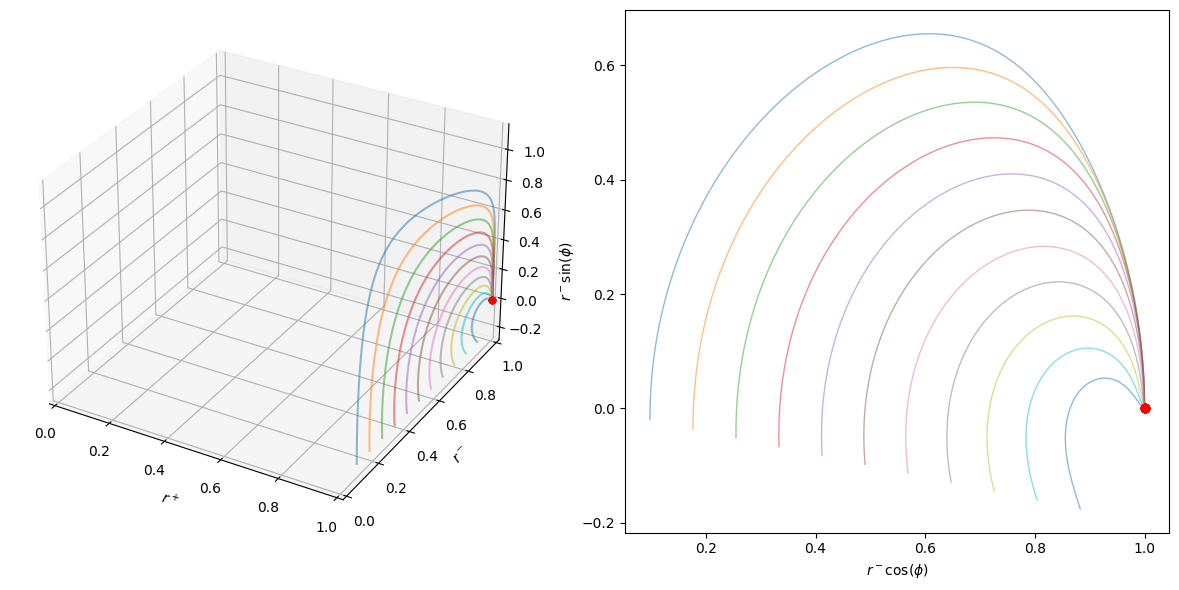

In [15]:
import numpy as np
from tqdm.notebook import tqdm
from itertools import product
import matplotlib.pyplot as plt

initStates = list(product([1], np.linspace(0.1, 0.9, 11), [-np.pi / 16]))
# alpha = np.pi / 2 - 0.05
K = 0.6
mul = 1
# model = Abrams2008(alpha0=np.pi / 2 - 0.05, alpha1=np.pi / 2 - 0.1, Kmu=K * mul, Knu=(1 - K) * mul, delta=0.0)
model = Abrams2008(alpha0=np.pi / 2 - 0.05, alpha1=np.pi / 2, Kmu=K, Knu=K, delta=0)
dt = 0.02

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121, projection='3d')
ax2 = plt.subplot(122, projection=None)
totalStates = dict()

for initState in tqdm(initStates):
    initState = np.array(initState)
    states = [initState]
    state = initState
    for i in range(15000):
        dot = model.dot(state)
        state = state + dot * dt
        state[[0, 1]] = np.clip(state[[0, 1]], 0.001, 1)
        # state[2] = state[2] % (2 * np.pi)
        states.append(state)
        if np.linalg.norm(dot) < 1e-9:
            break

    states = np.array(states)
    totalStates[tuple(initState)] = states
    ax1.plot(states[:, 0], states[:, 1], states[:, 2], alpha=0.5)
    ax1.scatter(states[-1, 0], states[-1, 1], states[-1, 2], c='r')
    lookRIdx = 1
    ax2.plot(states[:, lookRIdx] * np.cos(states[:, 2]), states[:, lookRIdx] * np.sin(states[:, 2]), alpha=0.5, lw=1)
    ax2.scatter(states[-1:, lookRIdx] * np.cos(states[-1:, 2]), states[-1:, lookRIdx] * np.sin(states[-1:, 2]), c='r', zorder=10)

ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_xlabel(r"$r^+$")
ax1.set_ylabel(r"$r^-$")
# ax2.set_xlim(0, 1)
# ax2.set_ylim(-0.5, 0.5)
ax2.set_xlabel(r"$r^- \cos(\phi)$")
ax2.set_ylabel(r"$r^- \sin(\phi)$")

plt.tight_layout()
plt.show()

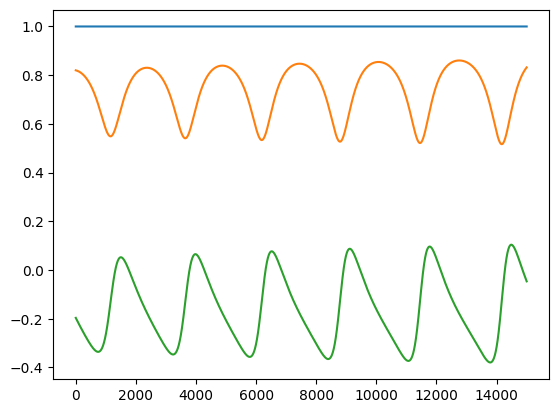

In [163]:
# plt.figure(figsize=(6, 6))
# for idx, initState in enumerate(list(totalStates.keys())):
initState = list(totalStates.keys())[9]  # 114, 98
states = totalStates[initState]
# plt.plot(states[:, 0] - states[:, 1])
plt.plot(states[:, 0])
plt.plot(states[:, 1])
plt.plot(states[:, 2])
# plt.plot(states[:, 0] * np.cos(states[:, 2]), states[:, 0] * np.sin(states[:, 2]), alpha=0.5)
# plt.scatter(states[-1, 0] * np.cos(states[-1, 2]), states[-1, 0] * np.sin(states[-1, 2]), c='r', zorder=10)
# plt.xlim(-1, 1)
# plt.ylim(-1, 1)
plt.show()

In [19]:
import sympy as sp

# K, N, alpha0 = sp.symbols(r"K N \alpha_0")
K, N, alpha0 = 9.6, 4, 0.1

J = np.array([
    [-N / 2 * (1 + np.cos(alpha0)), 1, np.cos(alpha0), np.cos(alpha0)],
    [1, -N / 2 * (1 + np.cos(alpha0)), np.cos(alpha0), np.cos(alpha0)],
    [np.cos(alpha0), np.cos(alpha0), -N / 2 * (1 + np.cos(alpha0)), 1],
    [np.cos(alpha0), np.cos(alpha0), 1, -N / 2 * (1 + np.cos(alpha0))]
]) * K / N

# J = sp.Matrix([
#     [-N / 2 * (1 + sp.cos(alpha0)), 1, sp.cos(alpha0), sp.cos(alpha0)],
#     [1, -N / 2 * (1 + sp.cos(alpha0)), sp.cos(alpha0), sp.cos(alpha0)],
#     [sp.cos(alpha0), sp.cos(alpha0), -N / 2 * (1 + sp.cos(alpha0)), 1],
#     [sp.cos(alpha0), sp.cos(alpha0), 1, -N / 2 * (1 + sp.cos(alpha0))]
# ]) * K / N

print(J)

eigenvalues, eigenvectors = np.linalg.eig(J)

print(np.sort(eigenvalues))

[[-9.57601999  2.4         2.38801     2.38801   ]
 [ 2.4        -9.57601999  2.38801     2.38801   ]
 [ 2.38801     2.38801    -9.57601999  2.4       ]
 [ 2.38801     2.38801     2.4        -9.57601999]]
[-11.97601999 -11.97601999 -11.95203999  -2.4       ]


In [92]:
from itertools import product
import numpy as np

# module = sp
module = np

halfLength = 3
N = int(halfLength * 2)

if module == np:
    K, alpha0 = 9.6, 0.1
else:
    K, alpha0 = sp.symbols(r"K \alpha_0")

totalRows = list()

for i in range(halfLength * 2):
    rowOfA = list()
    if i < halfLength:
        row = [1] * halfLength + [module.cos(alpha0)] * halfLength
        row[i] = -N / 2 * (1 + module.cos(alpha0))
    else:
        row = [module.cos(alpha0)] * halfLength + [1] * halfLength
        row[i] = -N / 2 * (1 + module.cos(alpha0))
    totalRows.append(row)

if module == sp:
    J = sp.Matrix(totalRows) * K / N
    display(J)
else:
    J = np.array(totalRows) * K / N
    eigenvalues, eigenvectors = np.linalg.eig(J)
    # print(eigenvalues)
    if (np.abs(eigenvalues.imag) < 0.001).all():
        eigenvalues = eigenvalues.real
    eigenvalues = eigenvalues.round(5)
    uniqueEigenvalues = np.sort(np.unique(eigenvalues))
    for uniqueEigenvalue in uniqueEigenvalues:
        print(f"eigenvalue: {uniqueEigenvalue:.5f}, multiplicity: {np.sum(eigenvalues == uniqueEigenvalue)}")



eigenvalue: -11.17602, multiplicity: 4
eigenvalue: -11.15204, multiplicity: 1
eigenvalue: -1.60000, multiplicity: 1


In [77]:
eig1 = (-K * N * module.cos(alpha0) - K * N - 2 * K) / (2 * N)
print(np.round(eig1, 5))
eig2 = (-K * N * module.cos(alpha0) - K * N + 2 * K + 4 * K * module.cos(alpha0)) / (2 * N)
print(np.round(eig2, 5))
eig3 = (-K * N * module.cos(alpha0) - K * N + 2 * K - 4 * K * module.cos(alpha0)) / (2 * N)
print(np.round(eig3, 5))

-11.17602
-4.79201
-11.16003


In [113]:
(-K * N * module.cos(alpha0) - K * N + 2 * K + (N**2 - 3 * N) * K * module.cos(alpha0)) / (2 * N)

6.352039986669047

In [100]:
(-K * N * module.cos(alpha0) - K * N + 2 * K - 4 * K * module.cos(alpha0)) / (2 * N)

-11.160033322224207

In [ ]:
import numpy as np

eigenvalue: 2.388, eigenvector: [-0.40824829 -0.40824829 -0.40824829 -0.40824829 -0.40824829 -0.40824829]
eigenvalue: -11.976, eigenvector: [-8.16496581e-01  4.08248290e-01  4.08248290e-01 -1.57682348e-14
 -1.57682348e-14 -2.14467779e-14]
eigenvalue: -11.940, eigenvector: [-0.40824829 -0.40824829 -0.40824829  0.40824829  0.40824829  0.40824829]
eigenvalue: -11.976, eigenvector: [-0.19815293  0.76537993 -0.567227   -0.0941475  -0.0941475   0.188295  ]
eigenvalue: -11.976, eigenvector: [ 0.07403241  0.2630203  -0.3370527   0.73317826 -0.41859616 -0.3145821 ]
eigenvalue: -11.976, eigenvector: [ 0.11643154 -0.48836229  0.37193075 -0.1243461  -0.4793159   0.603662  ]


In [ ]:
eigAndMulti = J.eigenvals()
eigenvals = list(eigAndMulti.keys())
multiplicities = list(eigAndMulti.values())

In [40]:
eig1 = (-K * N * sp.cos(alpha0) - K * N - 2 * K) / (2 * N)

In [ ]:
eigAndMulti = J.eigenvals()
eigenvals = list(eigAndMulti.keys())
multiplicities = list(eigAndMulti.values())

for i in range(len(eigenvals)):
    display(eigenvals[i], multiplicities[i])

(-K*N*cos(\alpha_0) - K*N + 4*K*cos(\alpha_0) + 2*K)/(2*N)

1

(-K*N*cos(\alpha_0) - K*N - 4*K*cos(\alpha_0) + 2*K)/(2*N)

1

(-K*N*cos(\alpha_0) - K*N - 2*K)/(2*N)

2

In [89]:
eigAndMulti = J.eigenvals()
eigenvals = list(eigAndMulti.keys())
multiplicities = list(eigAndMulti.values())

for i in range(len(eigenvals)):
    display(eigenvals[i], multiplicities[i])

-0.25*K

1

-1.0*K*cos(\alpha_0) - 0.25*K

1

-0.5*K*cos(\alpha_0) - 0.75*K

2

In [91]:
eigAndMulti = J.eigenvals()
eigenvals = list(eigAndMulti.keys())
multiplicities = list(eigAndMulti.values())

for i in range(len(eigenvals)):
    display(eigenvals[i], multiplicities[i])

MatrixError: It is not always possible to express the eigenvalues of a matrix of size 5x5 or higher in radicals. We have CRootOf, but domains other than the rationals are not currently supported. If there are no symbols in the matrix, it should still be possible to compute numeric approximations of the eigenvalues using M.evalf().eigenvals() or M.charpoly().nroots().

In [11]:
import sympy as sp

delta, omega = sp.symbols(r"\Delta \omega")

f = 2 / sp.pi * delta / (omega**2 + 1)

f

sp.integrate(f, omega, (omega, 0, 1))

2*\Delta*(-log(2)/2 + pi/4)/pi